In [259]:
#https://www.kaggle.com/code/chittalpatel/wind-turbine-power-analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [260]:
csv_file = 'merged.csv'

# Define the column headers
headers = ['Execution time', 'Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

# Read the CSV file into a Pandas dfFrame
df = pd.read_csv(csv_file, names=headers, header=0, sep=';')
df.head()

,Execution time,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,23:56:51,1.01.2018 00:00,380.047791,5.311336,416.328908,259.994904
1,23:56:52,1.01.2018 00:10,453.769196,5.672167,519.917511,268.641113
2,23:56:53,1.01.2018 00:20,306.376587,5.216037,390.900016,272.564789
3,23:56:54,1.01.2018 00:30,419.645905,5.659674,516.127569,271.258087
4,23:56:55,1.01.2018 00:40,380.650696,5.577941,491.702972,265.674286


In [261]:
print(f'Num of rows: {df.shape[0]}\nNum of columns: {df.shape[1]}')

Num of rows: 50530
Num of columns: 6


In [262]:
# Split the date and time into separate columns
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['YEAR'] = df['Date/Time'].dt.year
df['MONTH'] = df['Date/Time'].dt.month
df['DAY'] = df['Date/Time'].dt.day
df['hour'] = df['Date/Time'].dt.hour
df['minute'] = df['Date/Time'].dt.minute

df = df.drop(columns=['Date/Time', 'Execution time'])

df.tail()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),YEAR,MONTH,DAY,hour,minute
50525,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40
50529,2820.466064,9.979332,2779.184096,82.274620,2018,12,31,23,50


In [263]:
# Check for missing values
df.isnull().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
YEAR                             0
MONTH                            0
DAY                              0
hour                             0
minute                           0
dtype: int64

In [264]:
from sklearn.model_selection import train_test_split

X= df.drop(['LV ActivePower (kW)'] , axis = 1)
y= df['LV ActivePower (kW)' ]


In [265]:
X.head()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),YEAR,MONTH,DAY,hour,minute
0,5.311336,416.328908,259.994904,2018,1,1,0,0
1,5.672167,519.917511,268.641113,2018,1,1,0,10
2,5.216037,390.900016,272.564789,2018,1,1,0,20
3,5.659674,516.127569,271.258087,2018,1,1,0,30
4,5.577941,491.702972,265.674286,2018,1,1,0,40


In [266]:
y.head()

0    380.047791
1    453.769196
2    306.376587
3    419.645905
4    380.650696
Name: LV ActivePower (kW), dtype: float64

In [267]:
# Assume your original dataframe is called 'df'
# Split into train and test sets (80% train, 20% test)
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=42, shuffle=False)

# Split the remaining 20% into validation and test sets (50% each)
x_test , x_val , y_test , y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42, shuffle=False)

total_len = len(df)

# Percentage of train set
train_len = len(x_train)
train_pct = (train_len / total_len) * 100

# Percentage of validation set
val_len = len(x_val)
val_pct = (val_len / total_len) * 100

# Percentage of test set
test_len = len(x_test)
test_pct = (test_len / total_len) * 100

print(f'Train set: {train_pct:.2f}%')
print(f'Validation set: {val_pct:.2f}%')
print(f'Test set: {test_pct:.2f}%')
print(f'Training set shape: {x_train.shape},{y_train.shape}, Validation set shape: {x_val.shape}, Test set shape: {x_test.shape}')

Train set: 80.00%
Validation set: 10.00%
Test set: 10.00%
Training set shape: (40424, 8),(40424,), Validation set shape: (5053, 8), Test set shape: (5053, 8)


In [268]:
x_test.head()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),YEAR,MONTH,DAY,hour,minute
40424,2.289220,0.0,231.980194,2018,10,18,22,40
40425,2.458950,0.0,222.679398,2018,10,18,22,50
40426,2.430004,0.0,215.388702,2018,10,18,23,0
40427,2.387723,0.0,227.553604,2018,10,18,23,10
40428,2.038939,0.0,241.738693,2018,10,18,23,20


In [269]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression


# Train a linear regression model on the training set
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R^2: {model.score(x_test, y_test):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.2f}')
print(f'MAE: {mean_absolute_error(y_test, pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, pred):.2f}')
print(pred)


Coefficients: [ 5.00605222e+01  7.69941120e-01  3.95731560e-01 -3.55271368e-15
  2.56583070e+01 -2.28109973e+00  1.08505898e+00  1.85313670e-02]
Intercept: -398.55101045718857
R^2: 0.97
RMSE: 206.69
MAE: 127.76
MSE: 42722.46
[  47.98625434   52.98771913   48.81199163 ... 3691.34503363 3672.07399908
 3674.04262854]


In [270]:
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor()
Regressor.fit(x_train, y_train)
yhat = Regressor.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)


MAE: 161.566


In [291]:
ACC_Decision=Regressor.score(x_test, y_test)
print(Regressor.score(x_test, y_test))

0.8685944640368908


In [271]:
from sklearn.metrics import r2_score
R2_Decision_Tree = r2_score(y_test,yhat)
print('R2: %.3f' %R2_Decision_Tree)

R2: 0.869


In [272]:
from sklearn.ensemble import RandomForestRegressor 
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(x_train, y_train )
yhat = forest_model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 121.961


In [273]:
from sklearn.metrics import r2_score
R2_Random_Forest = r2_score(y_test,yhat)
print('R2: %.3f' %R2_Random_Forest)

R2: 0.945


In [274]:
forest_model.score(x_train, y_train)

0.9858118754258502

In [275]:
ACC_Random_Forest=Regressor.score(x_test, y_test)
forest_model.score(x_test, y_test)

0.9453446014322973

In [276]:
from xgboost.sklearn import XGBRegressor
xgbRegressor = XGBRegressor()
xgbRegressor.fit(x_train, y_train)
yhat = xgbRegressor.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 136.691


In [277]:
R2_XGB = r2_score(y_test,yhat)
print('R2: %.3f' %R2_XGB)

R2: 0.930


In [278]:
print(xgbRegressor.score(x_train, y_train))


0.9922526685251318


In [279]:
ACC_XGB=xgbRegressor.score(x_test, y_test)
print(xgbRegressor.score(x_test, y_test))

0.9296923998913026


In [280]:
from sklearn.linear_model import BayesianRidge

brRegressor = BayesianRidge()
brRegressor.fit(x_train, y_train)
yhat = brRegressor.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 127.623


In [281]:
print(brRegressor.score(x_train, y_train))


0.9093598179548508


In [282]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit( x_train, y_train)
yhat = reg.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 107.399


In [283]:
R2_ExtraTrees = r2_score(y_test,yhat)
print('R2: %.3f' %R2_ExtraTrees)

R2: 0.968


In [284]:
print(reg.score(x_train, y_train))
# Overfitting ??

1.0


In [285]:
ACC_ExtraTrees=reg.score(x_test, y_test)
print(reg.score(x_test, y_test))

0.9680948900052831


In [286]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=20,learning_rate=0.5)
ada.fit(x_train , y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=20)

In [287]:
ada.score(x_train , y_train )


0.884467226984385

In [288]:
ACC_Ada=ada.score(x_test , y_test )
ada.score(x_test , y_test )

0.9193631433669132

In [289]:
R2_AdaBoost = r2_score(y_test,yhat)
print('R2: %.3f' %R2_AdaBoost)

R2: 0.968


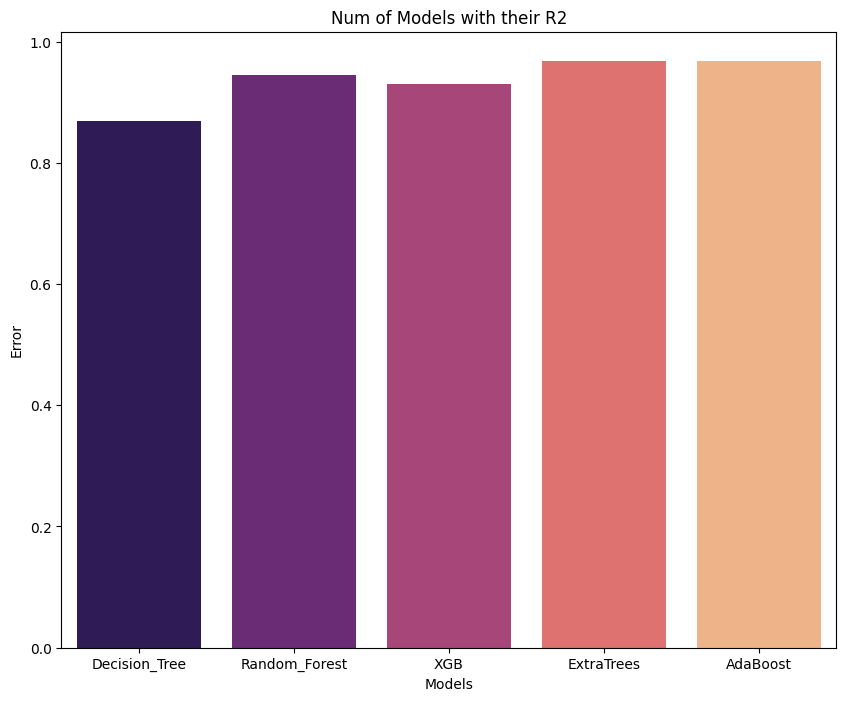

In [293]:
import seaborn as sns
Error = [R2_Decision_Tree , R2_Random_Forest , R2_XGB , R2_ExtraTrees , R2_AdaBoost]
dataPerf = pd.DataFrame(data={'Models': ['Decision_Tree', 'Random_Forest', 'XGB','ExtraTrees','AdaBoost'] ,
                              'Error': Error ,
                              'Accuracy':[ACC_Decision,ACC_Random_Forest,ACC_XGB,ACC_ExtraTrees,ACC_Ada]})

plt.figure(figsize=(10, 8))
sns.barplot(x="Models", y="Error", data=dataPerf, palette="magma")
plt.title('Num of Models with their R2')
plt.show()

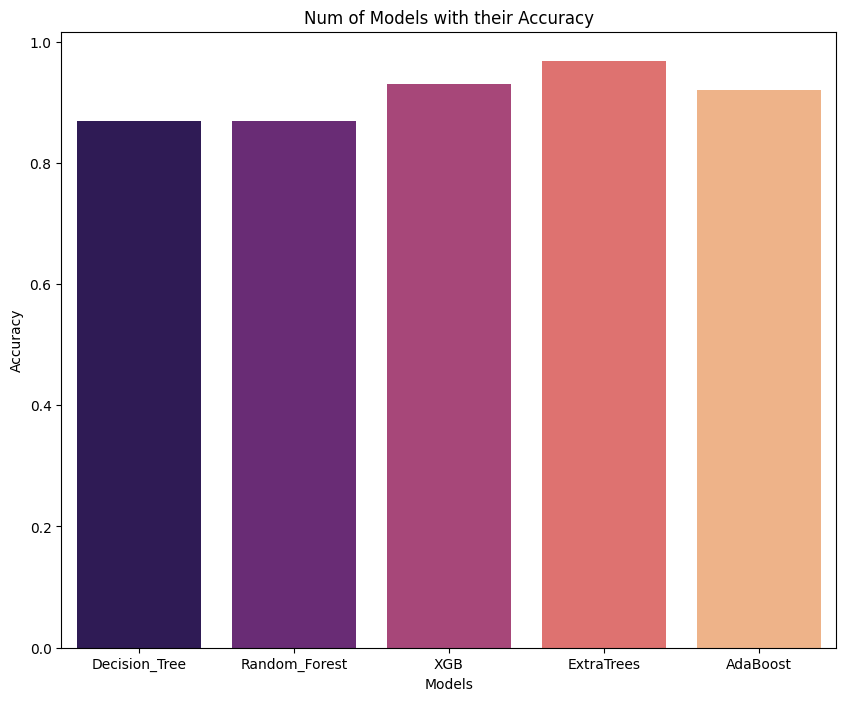

In [294]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Models", y="Accuracy", data=dataPerf, palette="magma")
plt.title('Num of Models with their Accuracy')
plt.show()